<a href="https://colab.research.google.com/github/Sriharish19/Bike-Demand-Prediction/blob/main/SH_Bike_Sharing_Demand_Prediction_ML_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import math

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/My_drive')

Drive already mounted at /content/My_drive; to attempt to forcibly remount, call drive.mount("/content/My_drive", force_remount=True).


In [3]:
# Loading the file
df = pd.read_csv('/content/My_drive/MyDrive/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')
df1 = pd.read_csv('/content/My_drive/MyDrive/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

In [4]:
# dataframe shape
df.shape

(8760, 14)

In [5]:
# top 5 rows in the dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# bottom 5 rows in the dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# Duplicates
df.duplicated().sum()

0

In [8]:
# Null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# Summary
df.describe([0.95,0.98,0.99])

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
95%,2043.000000,22.000000,30.700000,94.000000,3.700000,2000.000000,22.405000,2.560000,0.400000,0.200000
98%,2355.000000,23.000000,33.600000,97.000000,4.300000,2000.000000,23.900000,2.960000,2.000000,1.300000
99%,2526.230000,23.000000,35.100000,97.000000,4.700000,2000.000000,24.700000,3.170000,4.000000,2.500000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
# Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Numerical variables
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [13]:
# Categorical variables
columns = df.columns.tolist()
numerical_variables = df.describe().columns.tolist()

categorical_variables = [var for var in columns]
for var in columns:
  if var in numerical_variables:
    categorical_variables.remove(var)
print(categorical_variables)
print(numerical_variables)

['Date', 'Seasons', 'Holiday', 'Functioning Day']
['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [14]:
# Removing date column
df.drop('Date',axis = 1,inplace = True)

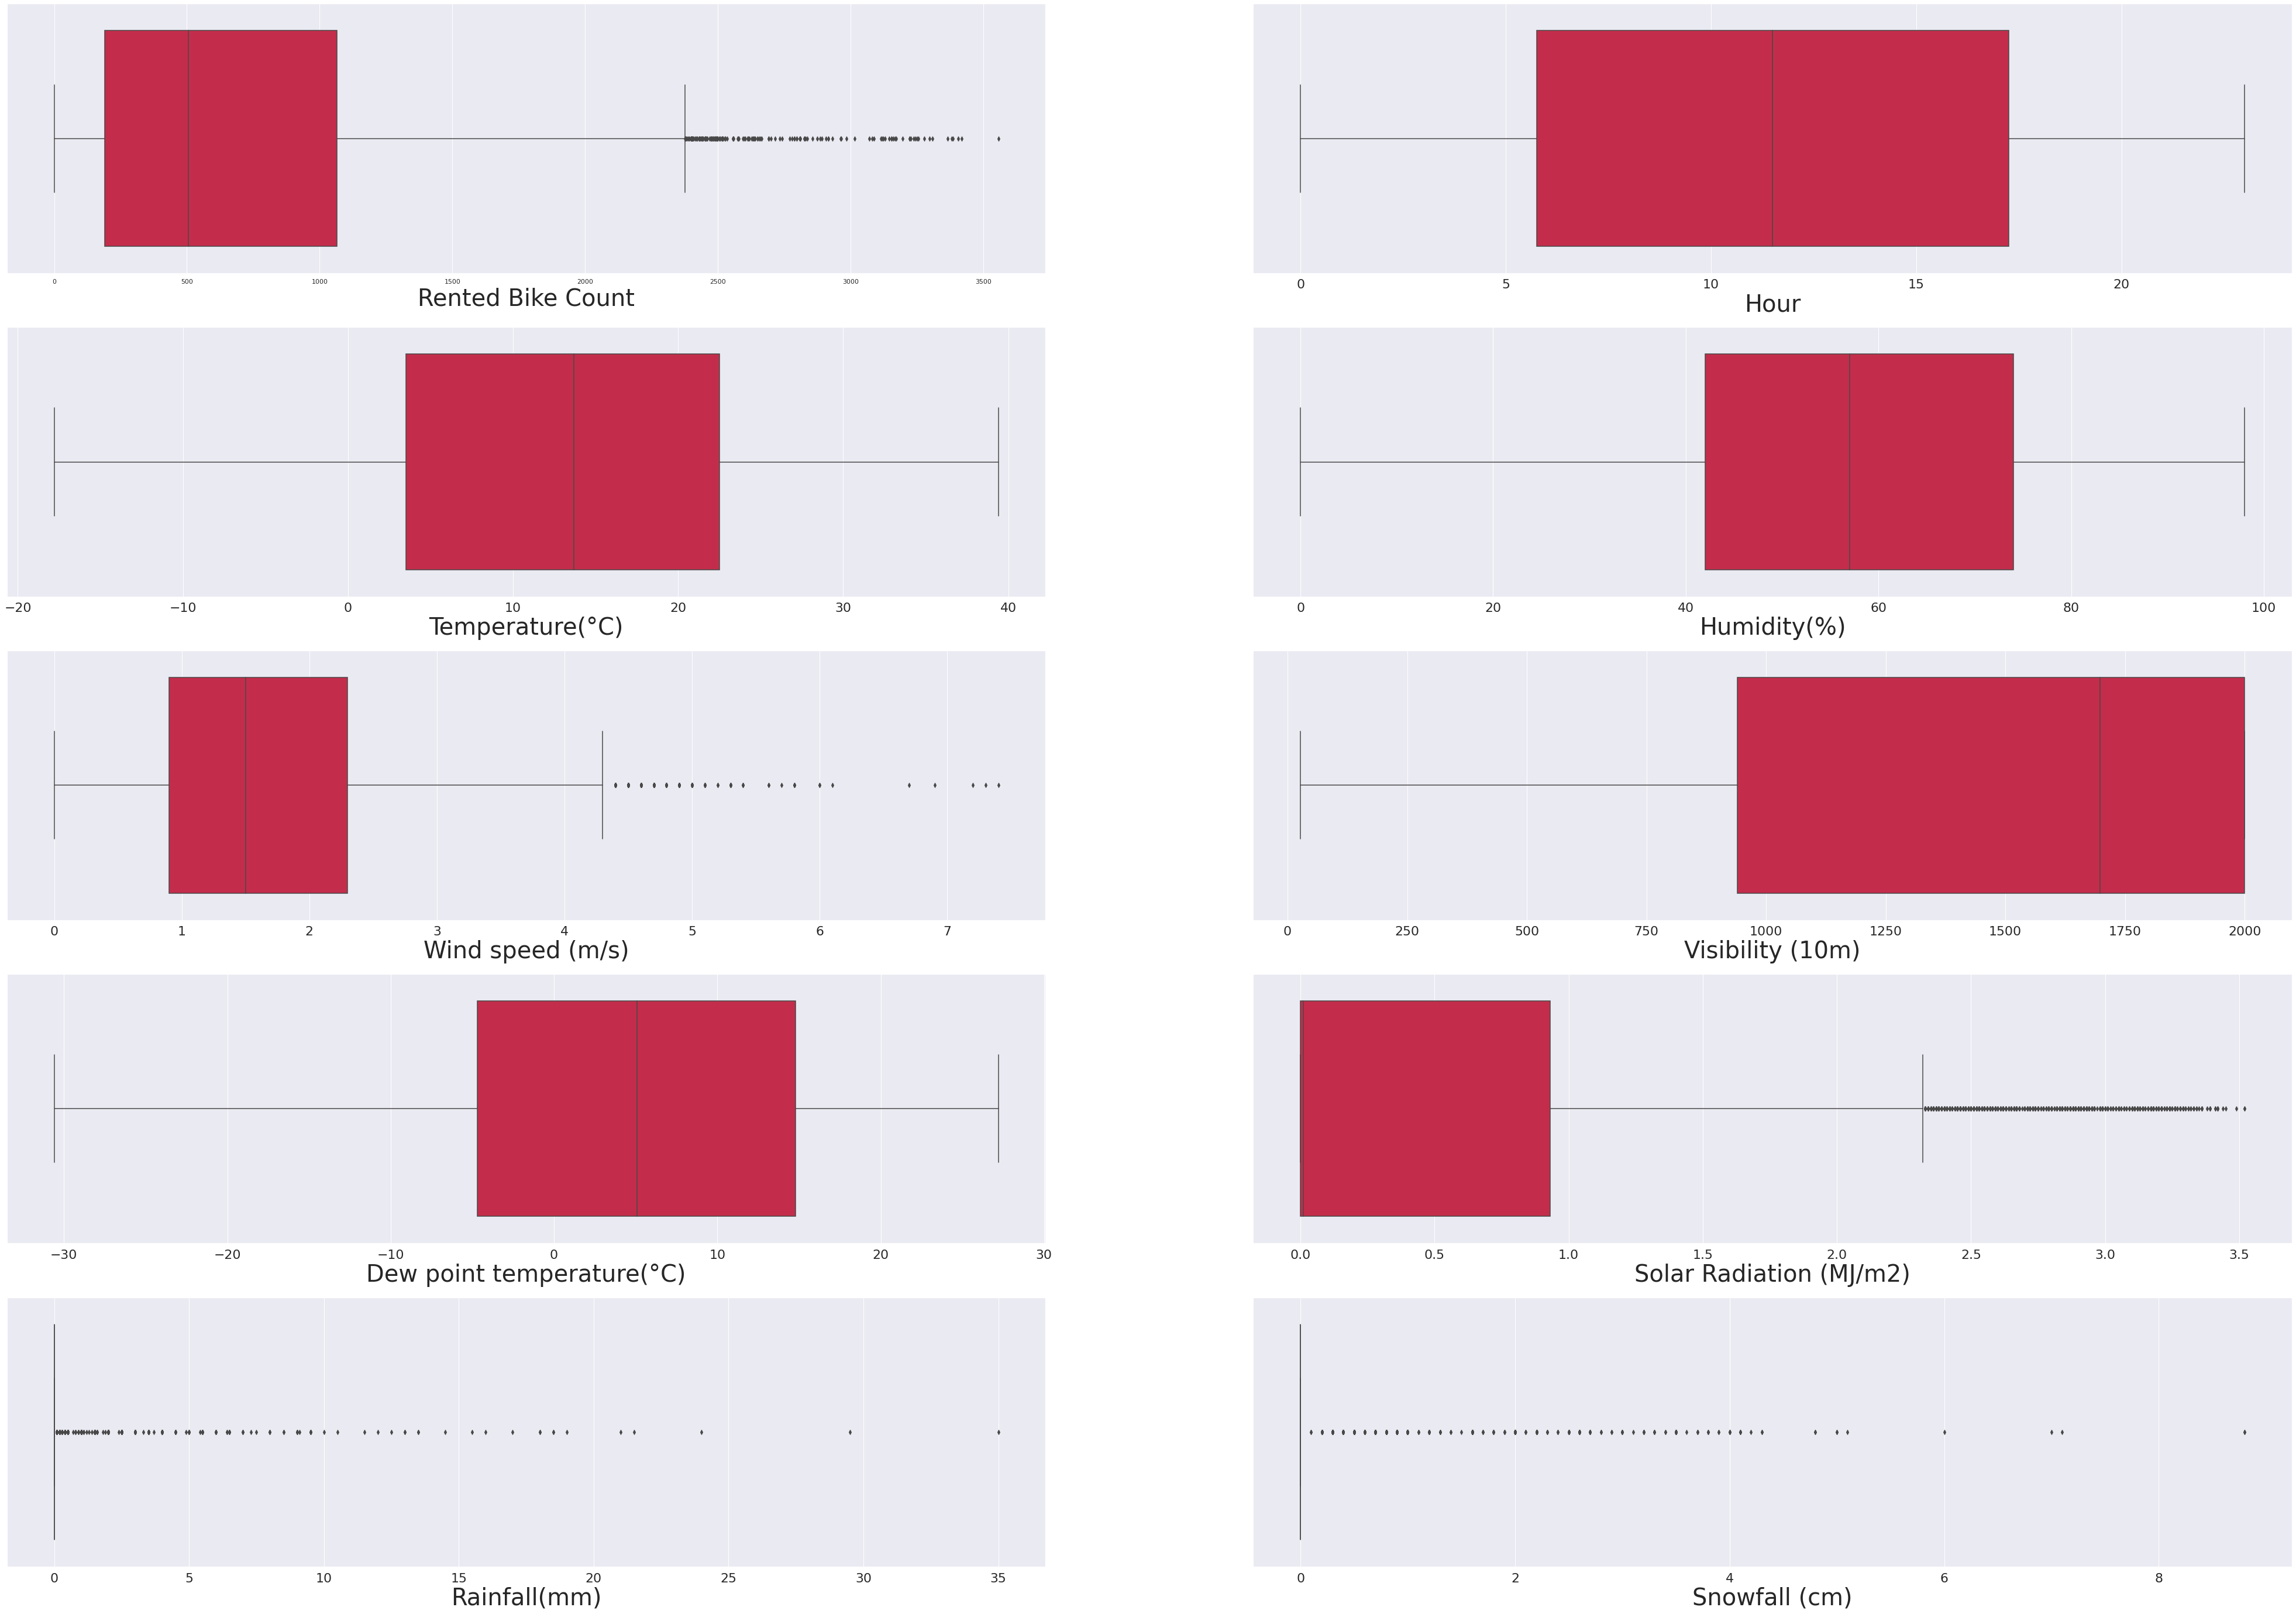

In [15]:
# Box plot to detect outliers
lst_box = numerical_variables
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='crimson')
    plt.xlabel(i[1],fontsize=40)

In [16]:
# Z Score based technique to remove outliers
lst = ['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)']
for i in lst:
  lower_limit = df[i].mean() - 3*df[i].std()
  print(i+'Lower_limit:',round(lower_limit,2))  
  upper_limit = df[i].mean() + 3*df[i].std()
  print(i+'Upper_limit:',round(upper_limit,2))
  df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

Rented Bike CountLower_limit: -1230.39
Rented Bike CountUpper_limit: 2639.59
Temperature(°C)Lower_limit: -22.95
Temperature(°C)Upper_limit: 48.72
Humidity(%)Lower_limit: -2.86
Humidity(%)Upper_limit: 119.31
Wind speed (m/s)Lower_limit: -1.38
Wind speed (m/s)Upper_limit: 4.83
Visibility (10m)Lower_limit: -388.07
Visibility (10m)Upper_limit: 3261.72
Dew point temperature(°C)Lower_limit: -35.11
Dew point temperature(°C)Upper_limit: 43.25
Solar Radiation (MJ/m2)Lower_limit: -2.04
Solar Radiation (MJ/m2)Upper_limit: 3.18


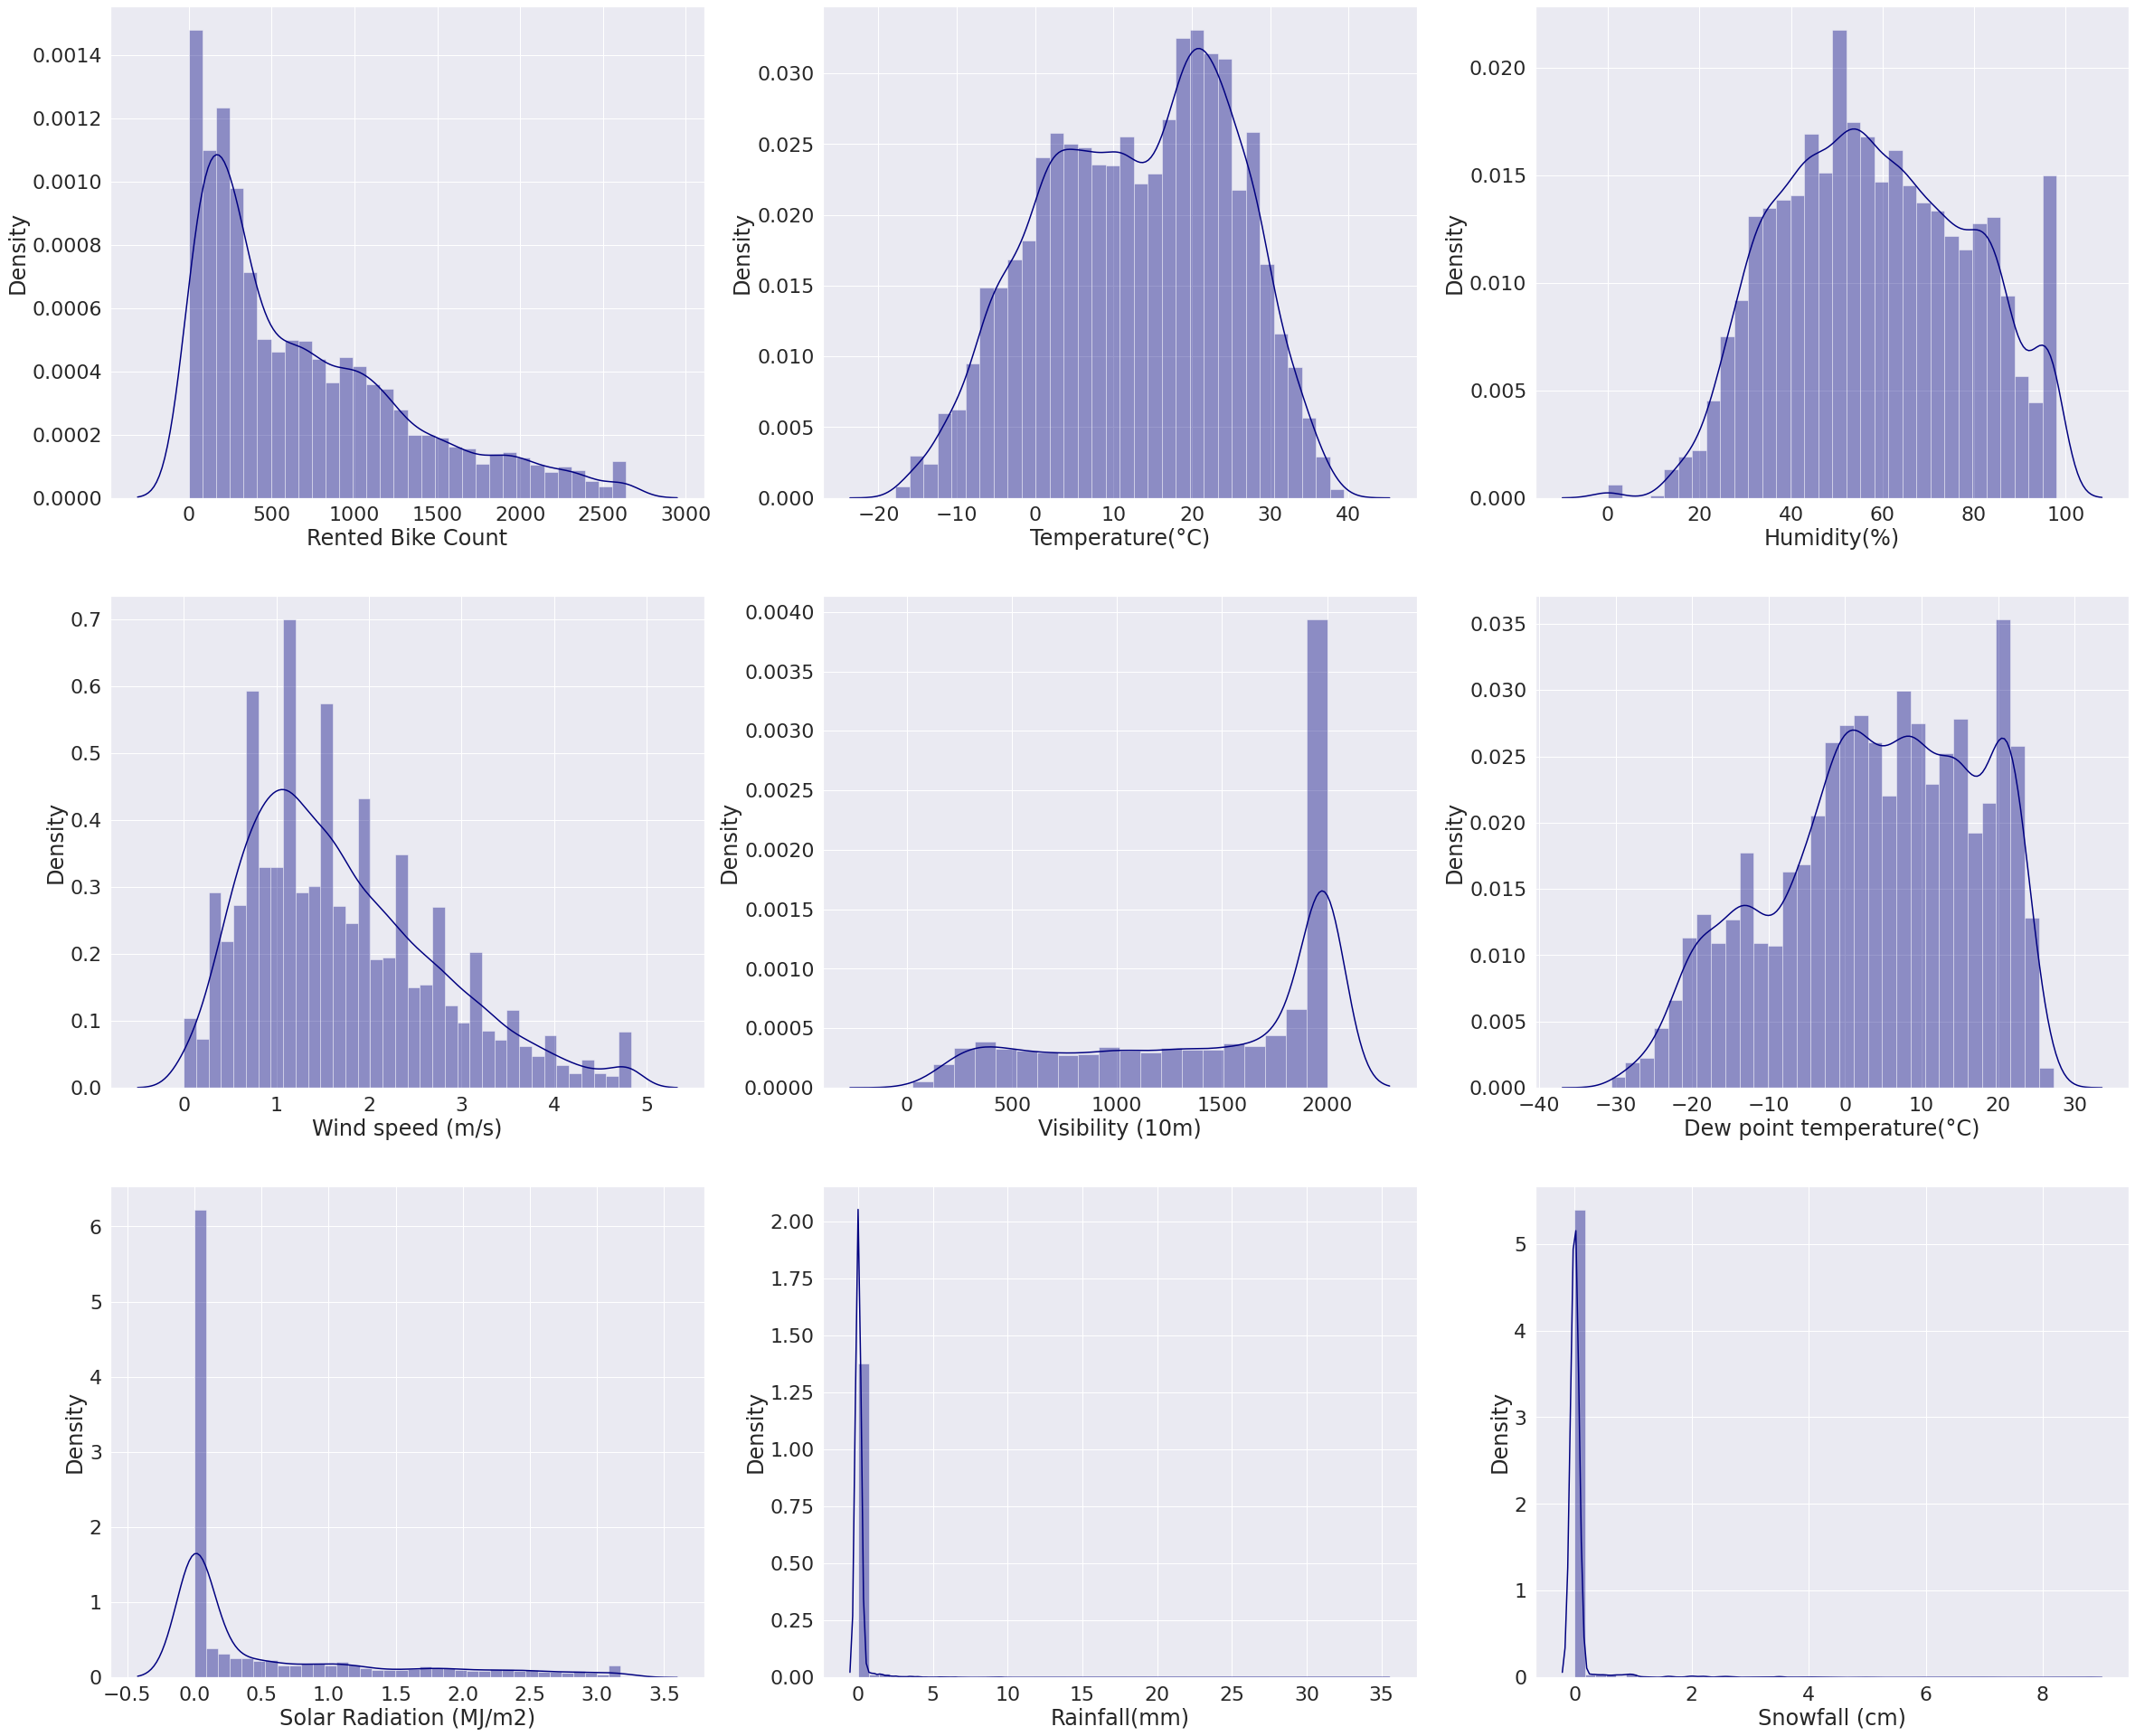

In [17]:
# Distribution plot for numerical variables
lst_dist = numerical_variables
numerical_variables.remove('Hour')
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 2)
  plt.subplot(6, 3,i[0]+1)
  sns.distplot(df[i[1]],color = 'navy')

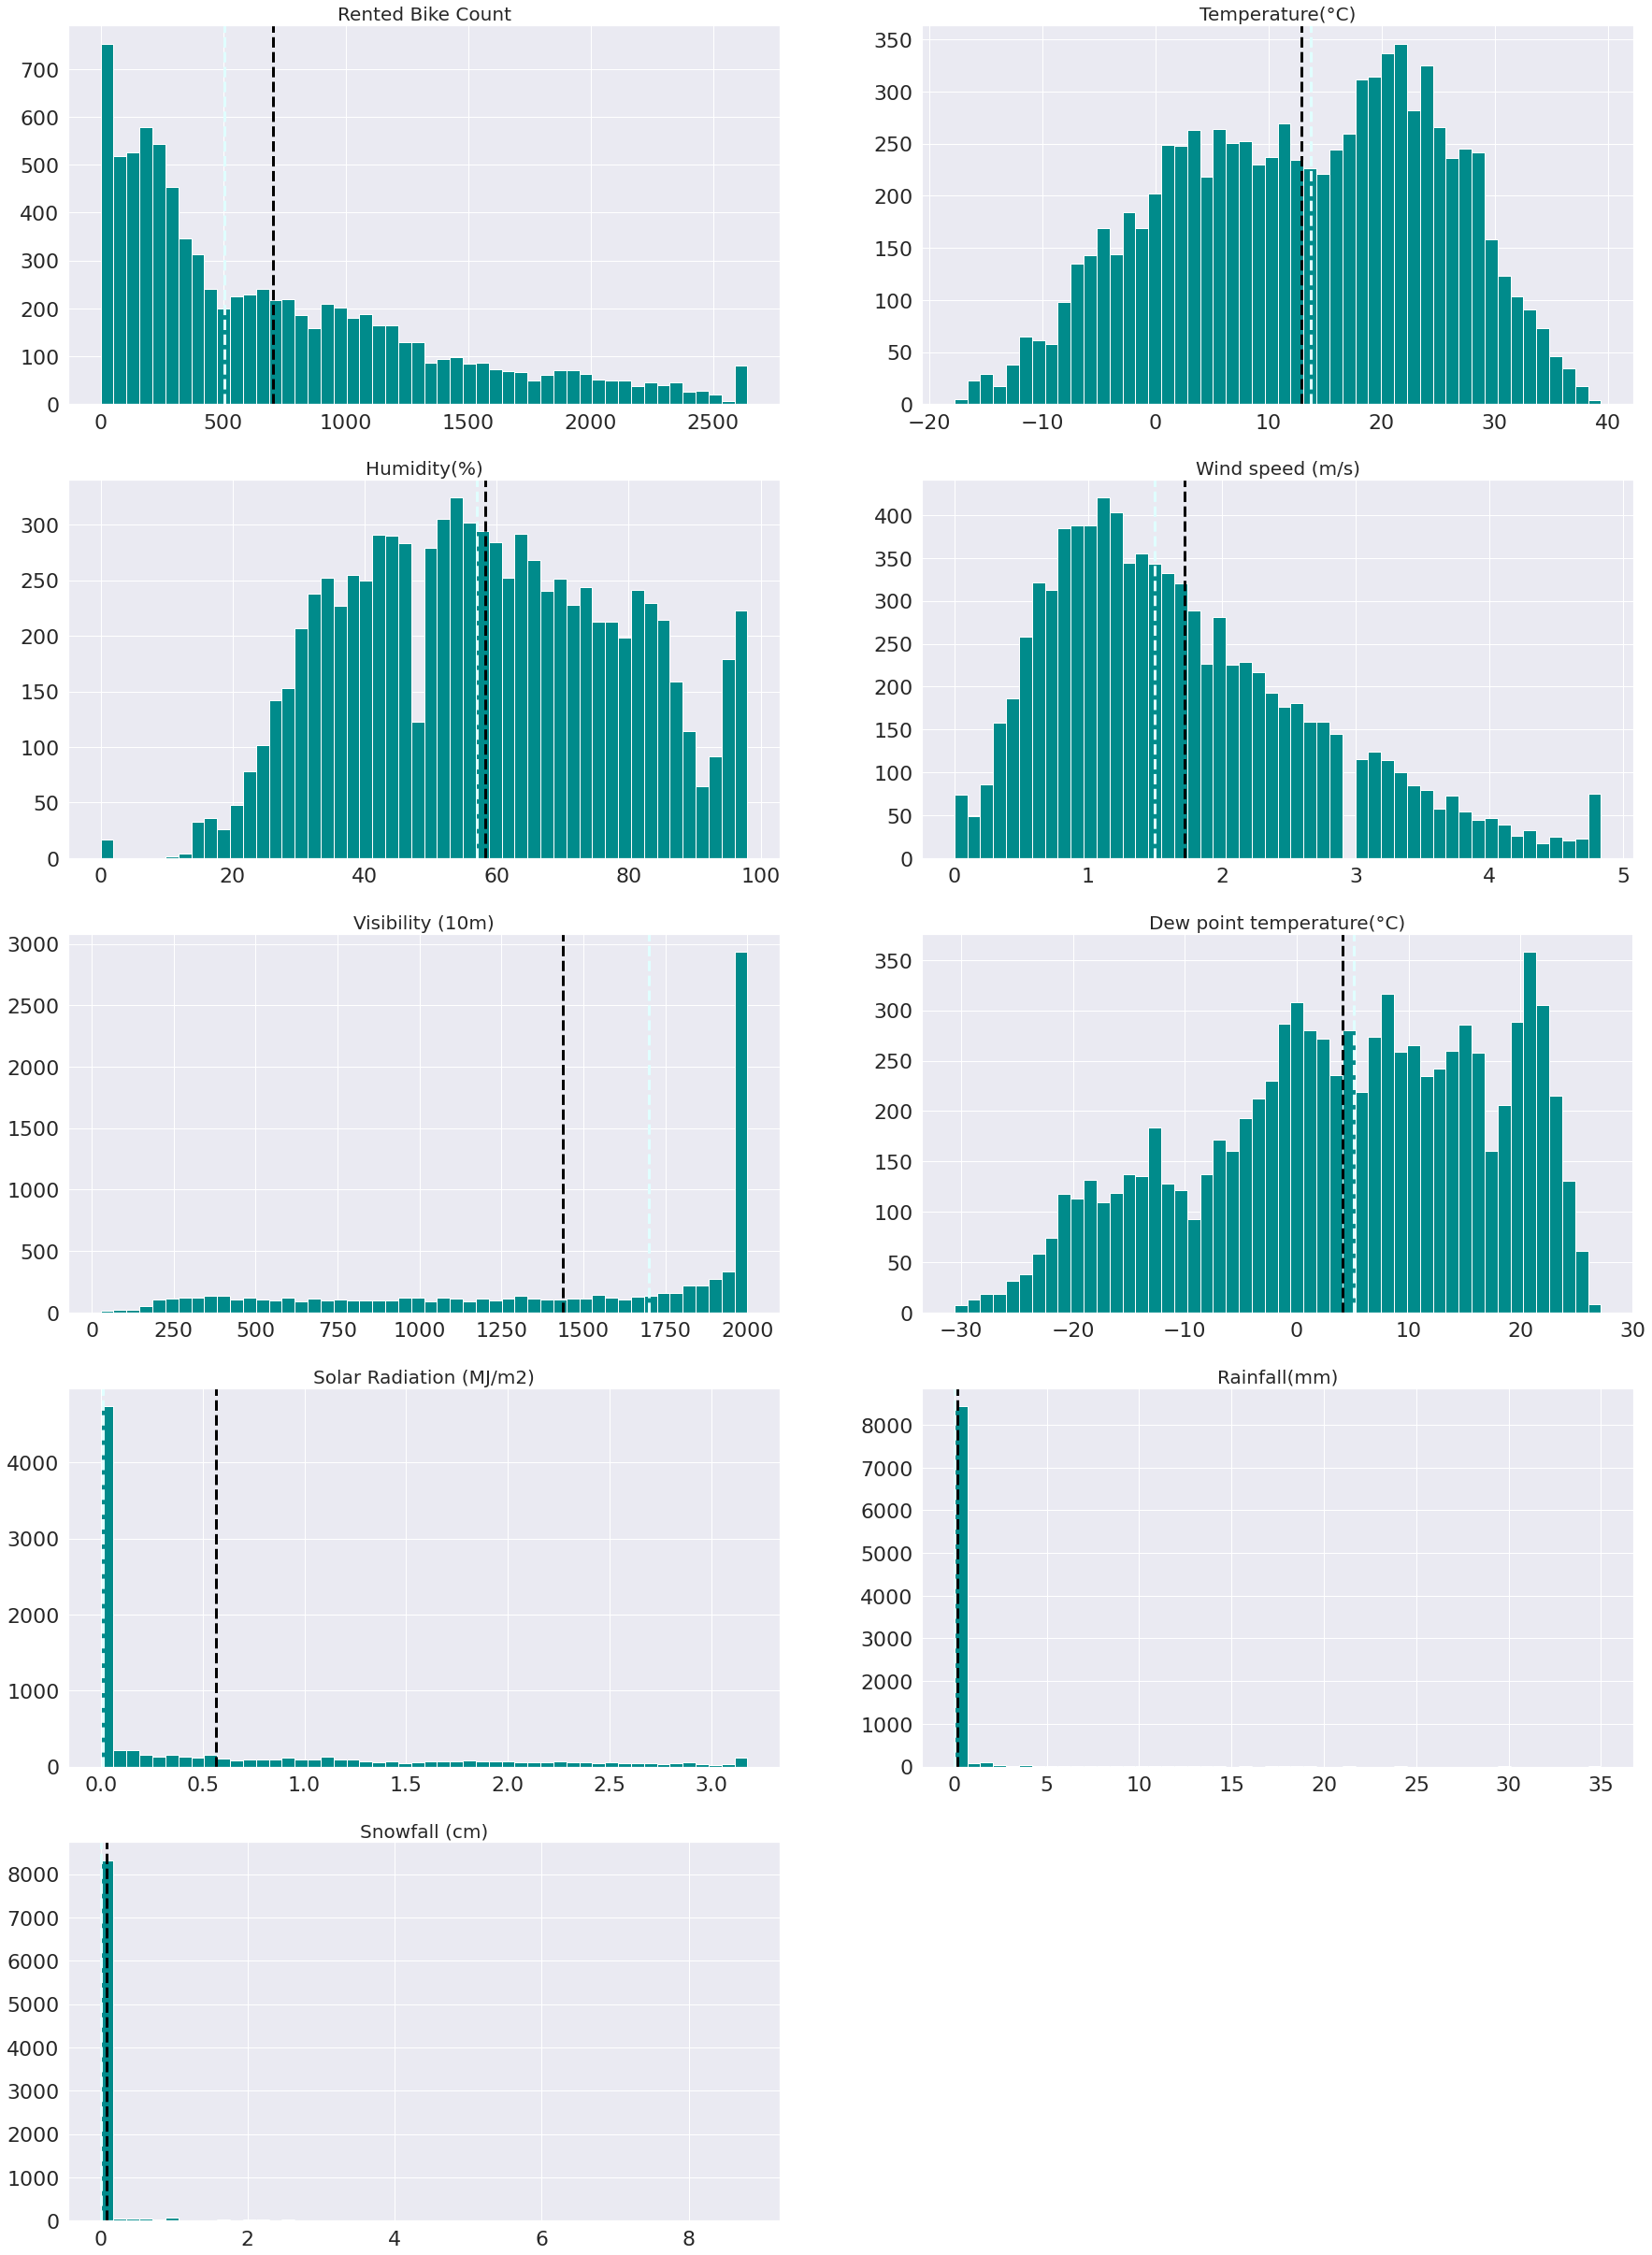

In [18]:
# Calculating mean and median

# numerical_variables.remove('Hour')
plt.figure(figsize = (30,70))

for i in enumerate(numerical_variables):
  plt.subplot(8, 2,i[0]+1)
  feature = df[i[1]]
  feature.hist(bins=50,color = 'darkcyan')
  plt.axvline(feature.mean(),color = 'black',linestyle='dashed', linewidth=3)
  plt.axvline(feature.median(),color = 'lightcyan',linestyle='dashed',linewidth=3)
  plt.title(i[1],fontsize = 20)

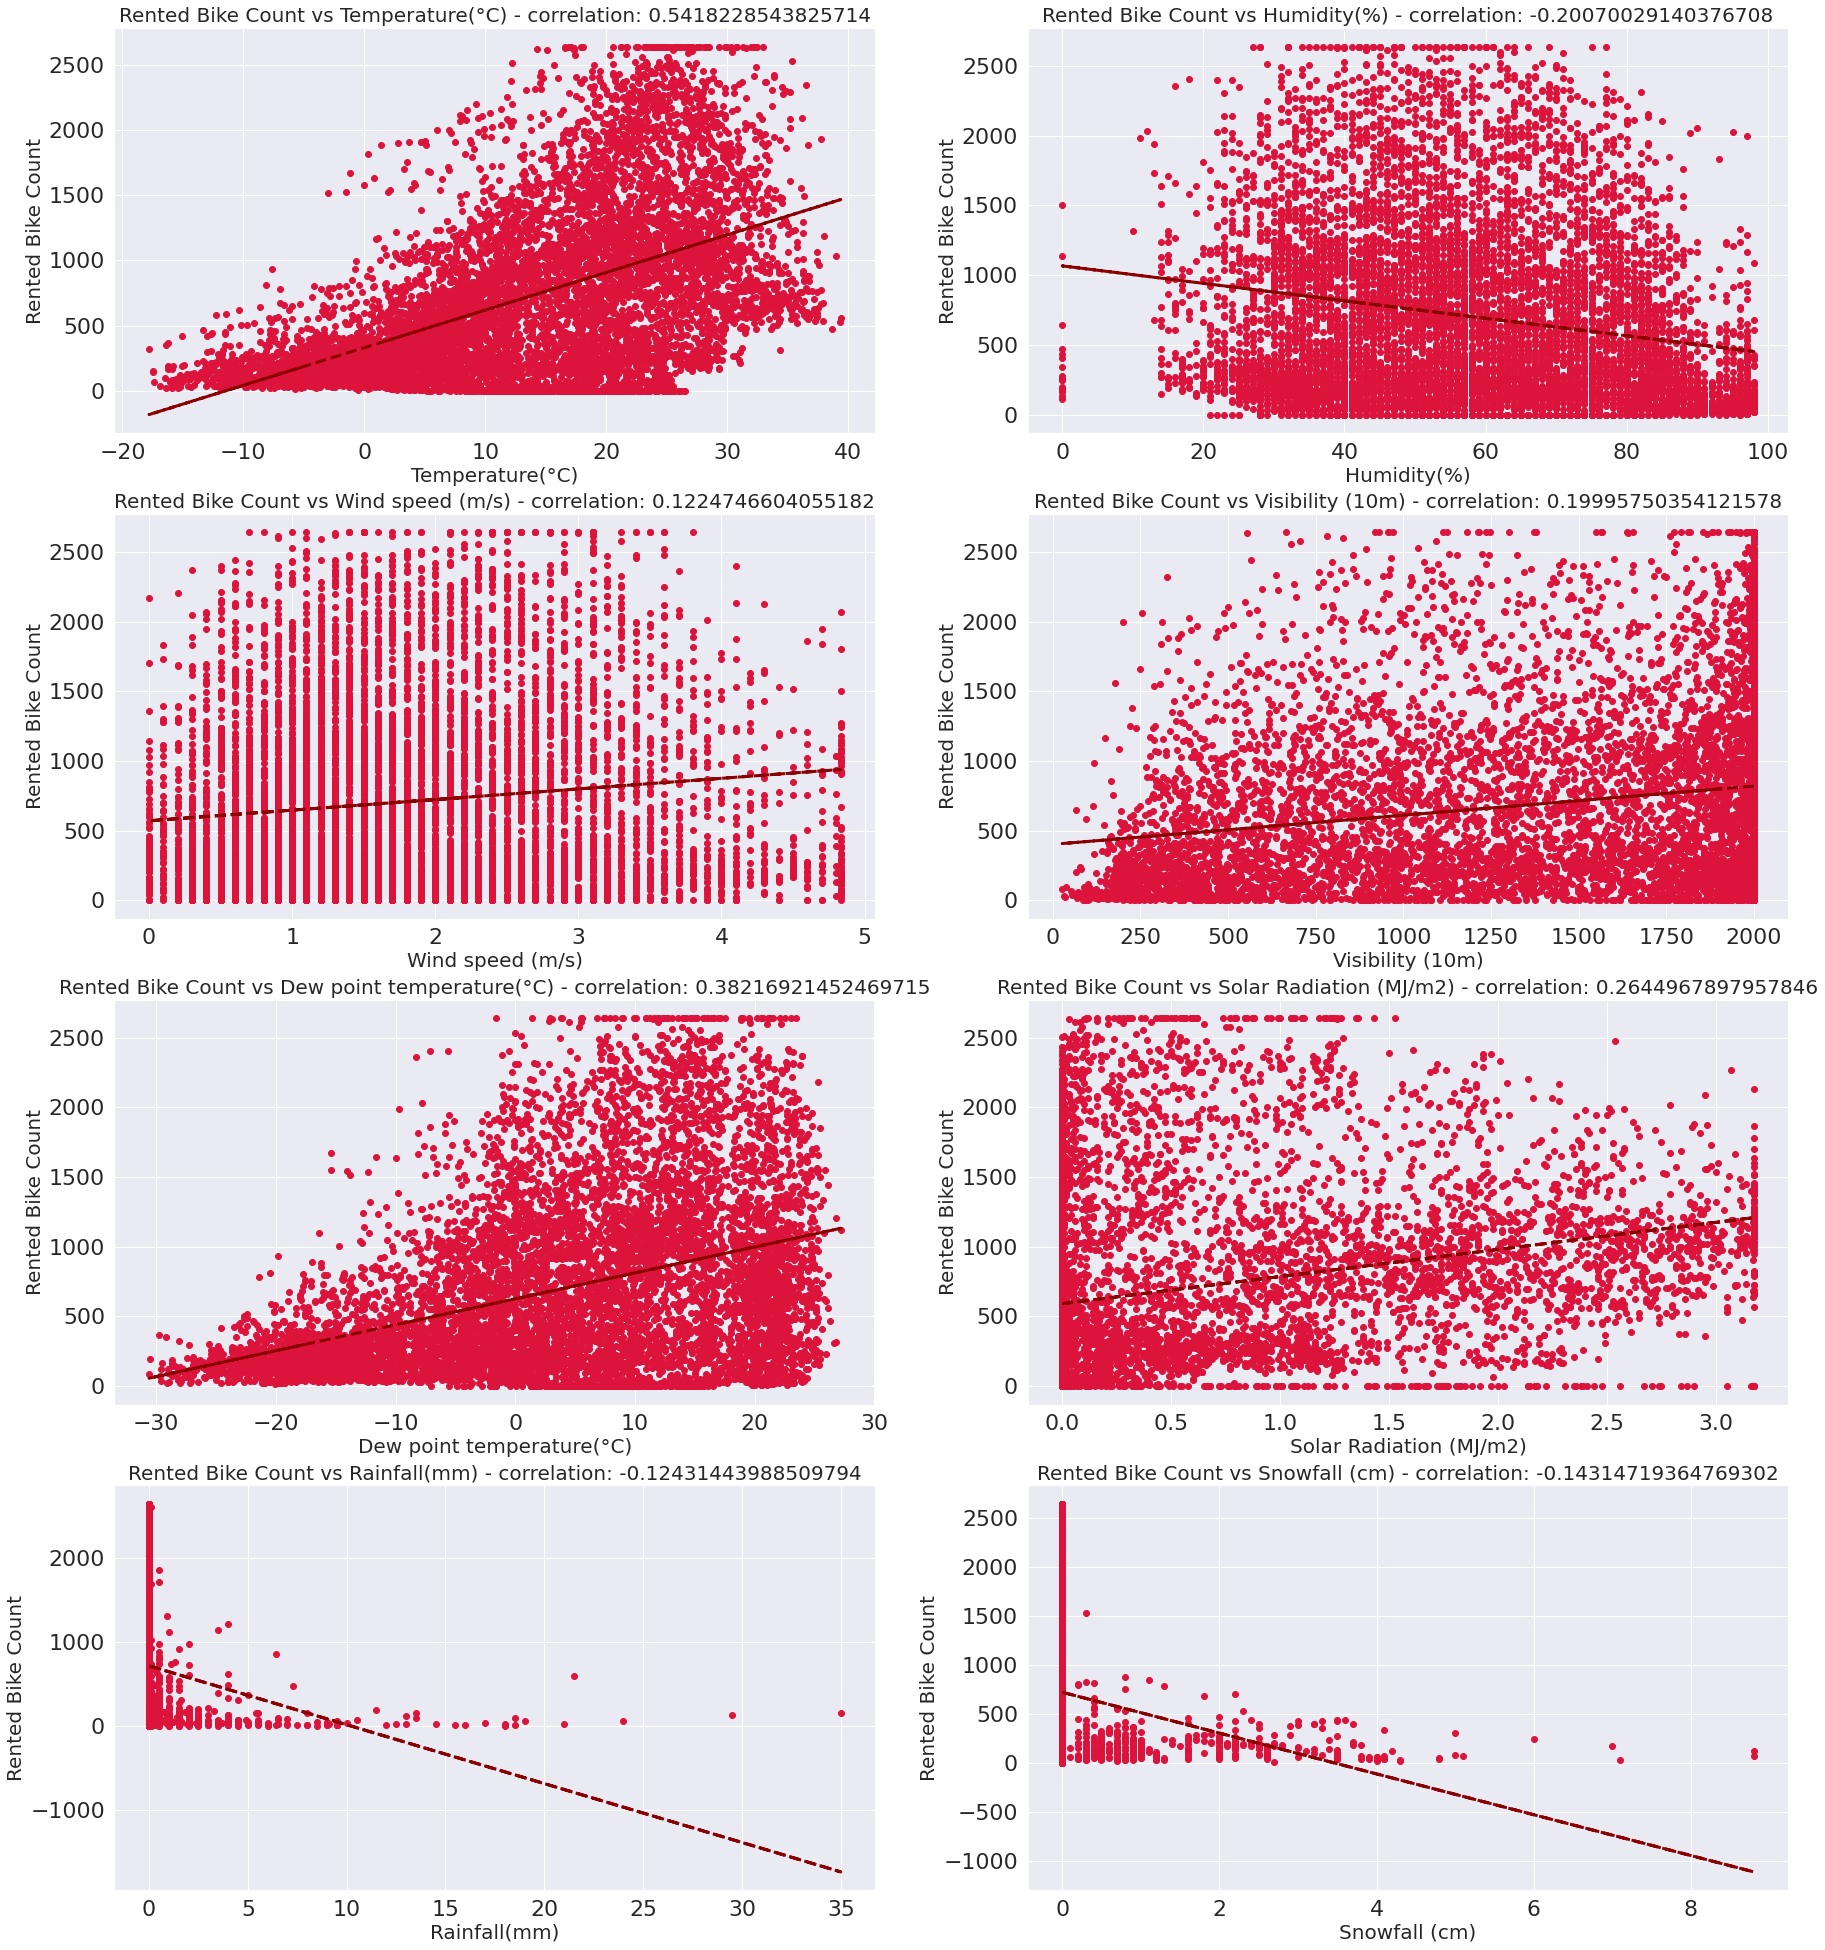

In [19]:
# Plotting scatter plot and correlation

plt.figure(figsize = (30,70))

numerical_variables.remove('Rented Bike Count')
for i in enumerate(numerical_variables):
  plt.subplot(8, 2,i[0]+1)
  feature = df[i[1]]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,color = 'crimson',alpha = 1)
  plt.xlabel(i[1],fontsize = 20)
  plt.ylabel('Rented Bike Count',fontsize = 20)
  plt.title('Rented Bike Count' + ' vs '  + i[1] + ' - correlation: ' + str(correlation),fontsize = 20)
  z = np.polyfit(df[i[1]], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[i[1]])
  plt.plot(df[i[1]], y_hat, "r--", lw=3,color = 'darkred')

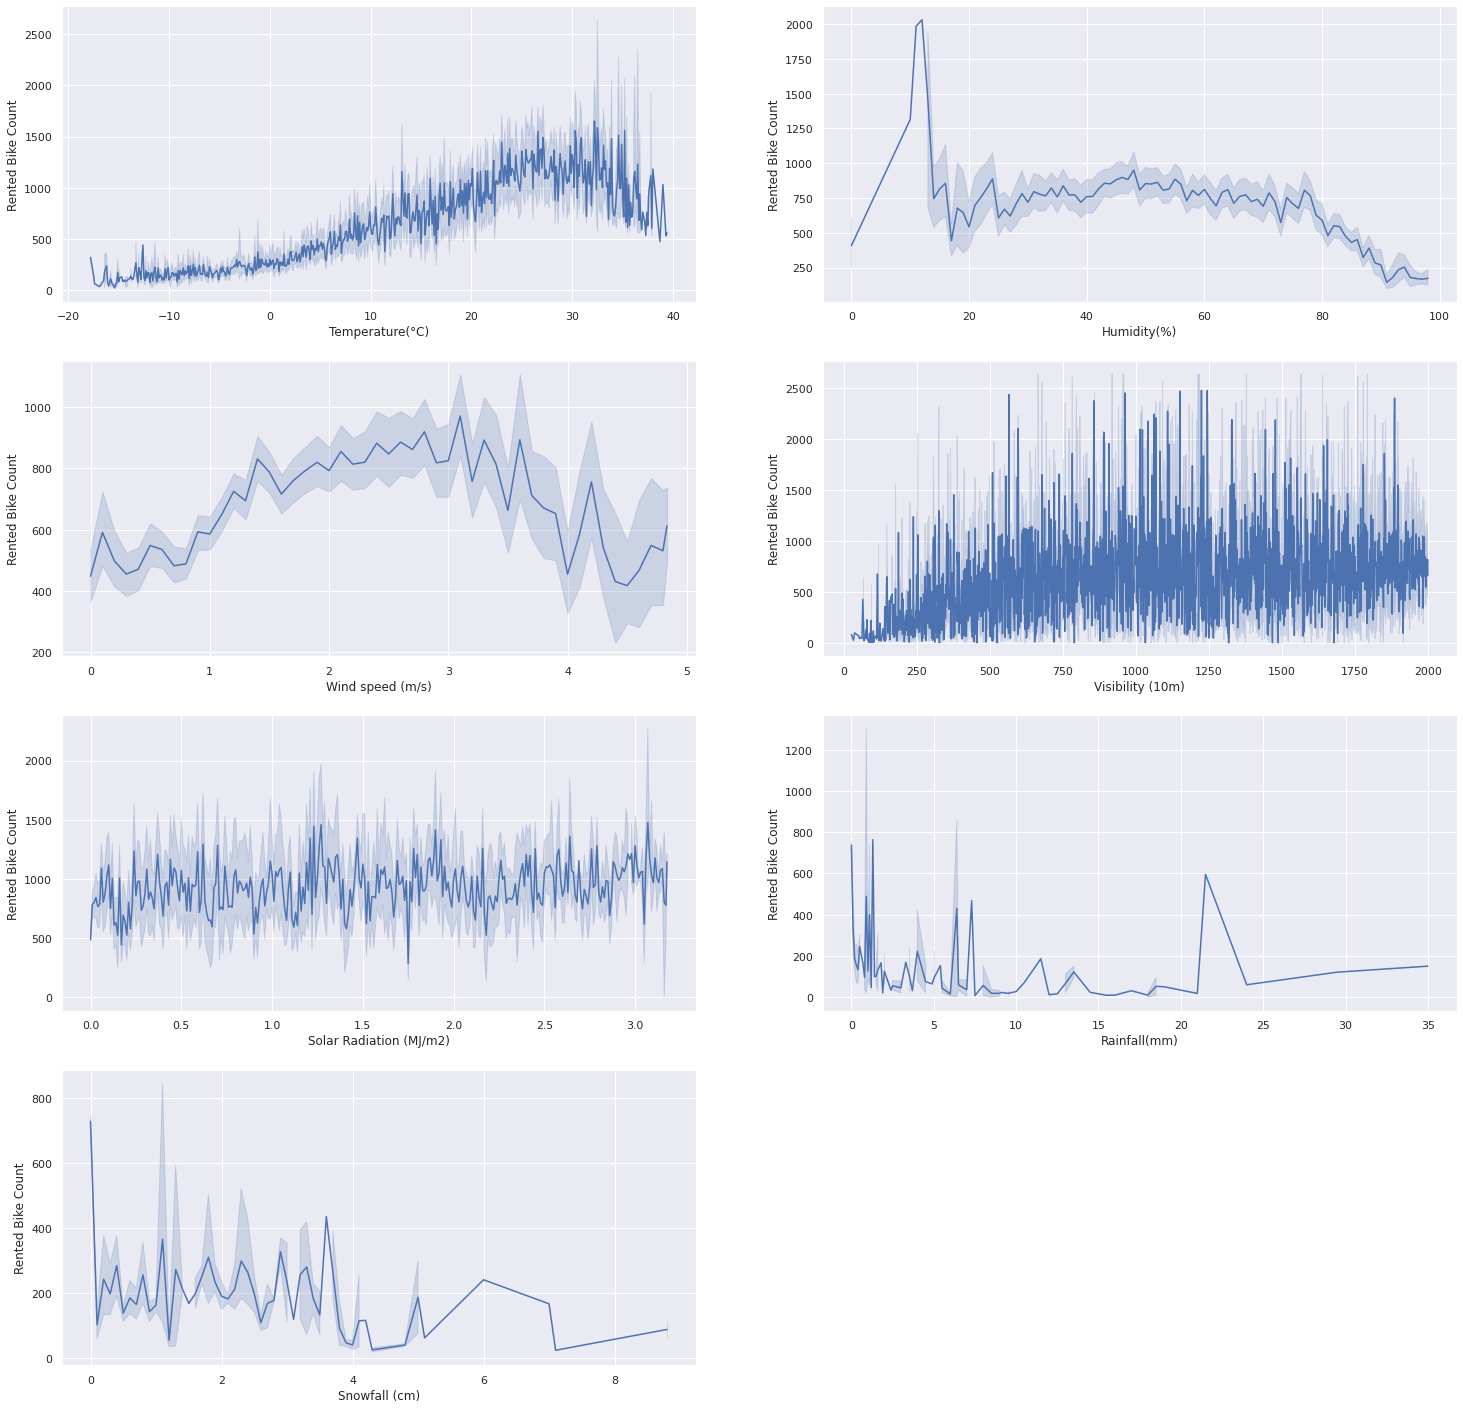

In [83]:
# line plot for numerical variables
ee = ['Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']
sns.set_theme(style="darkgrid")
plt.figure(figsize = (25, 25))
for i in enumerate(ee):
  plt.subplot(4,2,i[0]+1)
  sns.lineplot(x=df[i[1]],y='Rented Bike Count',data=df,palette='Grouped')

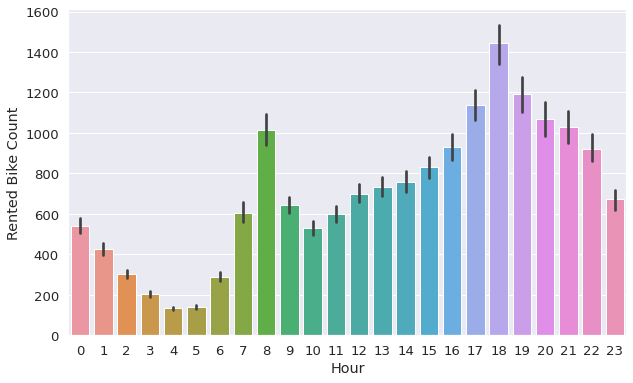

In [80]:
# Bar graph for hourly bike count
plt.figure(figsize=(10,6))
sns.barplot(x='Hour',y='Rented Bike Count',data=df)

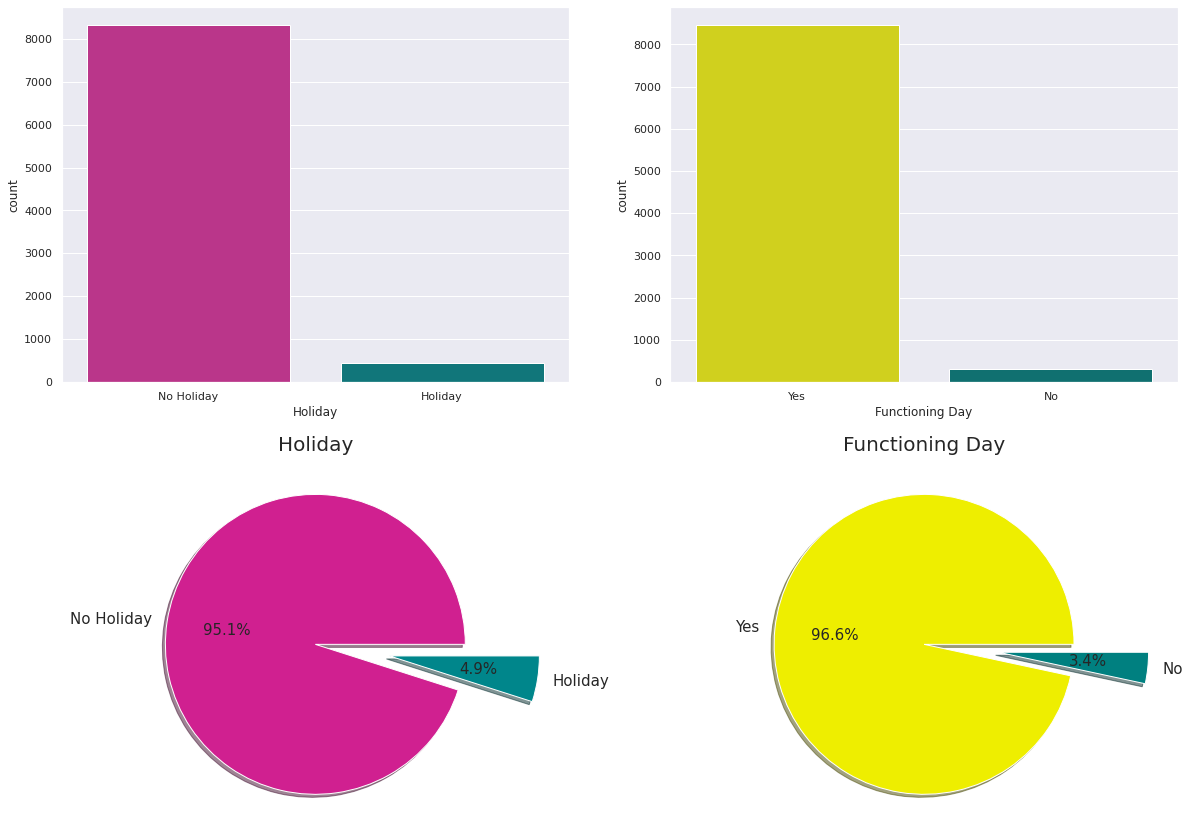

In [44]:
# Count Plot & pie chart for Holiday and functioning day
categorical_var_count = ['Holiday', 'Functioning Day','Holiday', 'Functioning Day']
plt.figure(figsize = (20,40))
sns.set_theme()
color = [['#D02090','#00868B'],['#EEEE00','#008080'],['#D02090','#00868B'],['#EEEE00','#008080']]
for i in enumerate(categorical_var_count):
  if i[0]<=1 :
    plt.subplot(5, 2,i[0]+1)
    sns.countplot(data = df, x = df[i[1]],palette= color[i[0]])
  else:
    plt.subplot(5, 2,i[0]+1)
    valuesh= df[i[1]].value_counts().tolist()
    labelh = df[i[1]].value_counts().index.tolist()
    plt.pie(valuesh ,labels=labelh , radius=1,explode = [0,0.5],colors=color[i[0]] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
    plt.rcParams['figure.figsize']=(9,8)
    plt.title(i[1],fontsize = 20)


In [47]:
#Convert the Date column in Datetime Dtype

df1['Date']=pd.to_datetime(df1['Date'],format='%d/%m/%Y')

#Breaking Down the Date into 3 Components
df1['Day']=df1['Date'].dt.day
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year


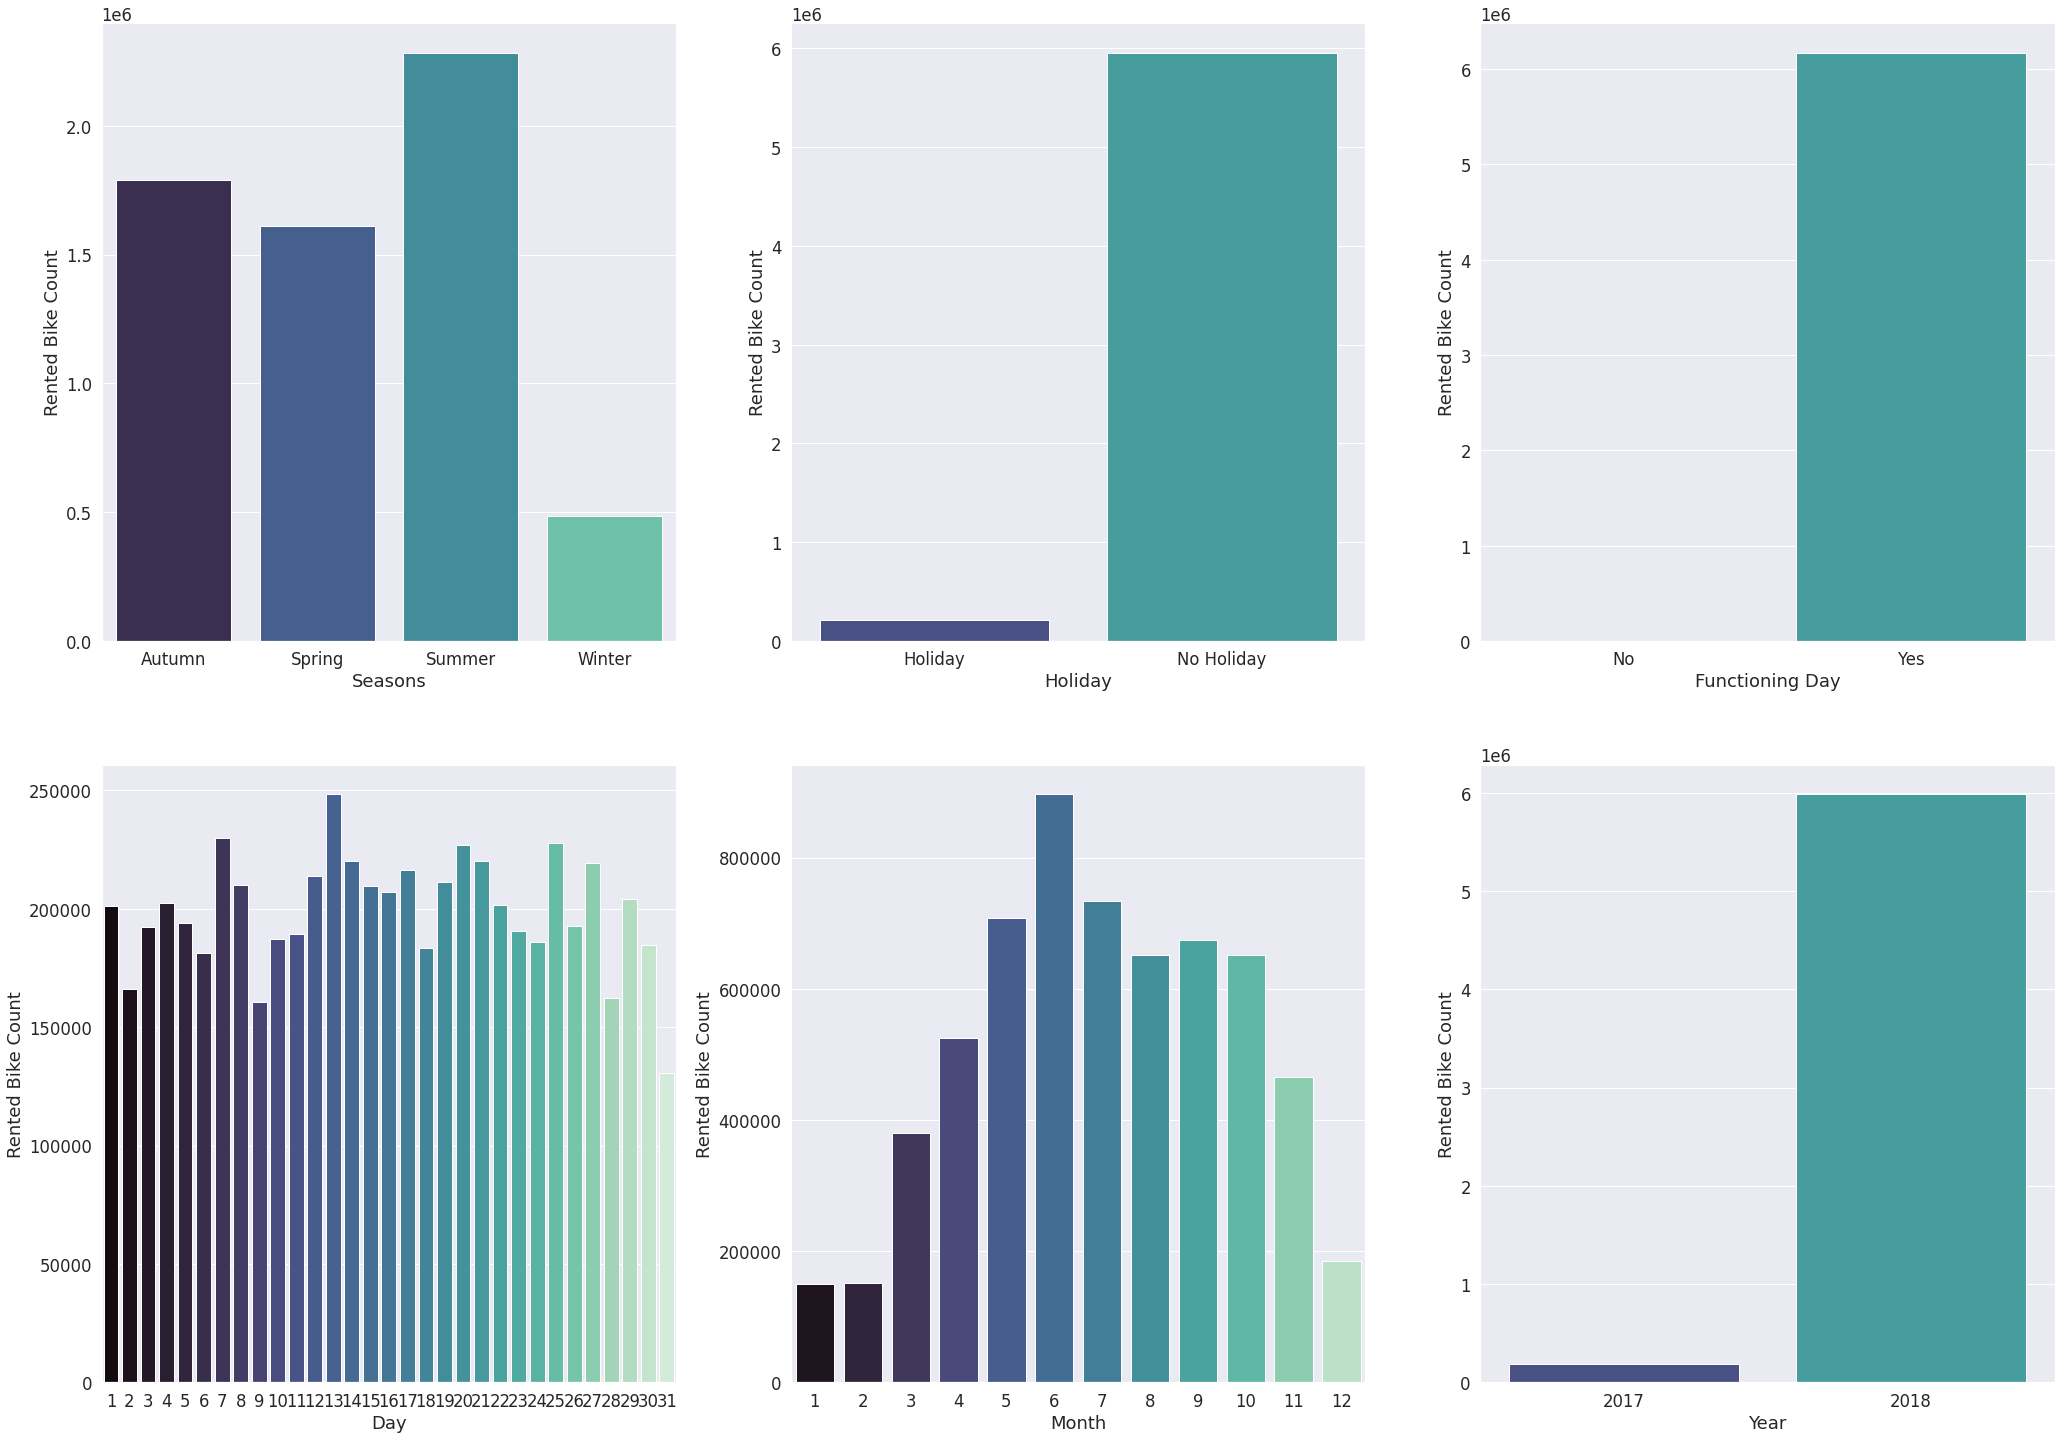

In [68]:
# Rented Bike Counts
seasons = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Seasons']).sum()).reset_index()
holiday = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Holiday']).sum()).reset_index()
Functioning_Day = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Functioning Day']).sum()).reset_index()
Day = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Day']).sum()).reset_index()
Month = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Month']).sum()).reset_index()
Year = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Year']).sum()).reset_index()
lst_dp = [seasons,holiday,Functioning_Day,Day,Month,Year]
lst_ft = ['Seasons','Holiday','Functioning Day','Day','Month','Year']

plt.figure(figsize = (35, 25))

for i in enumerate(lst_dp):
    plt.subplot(2,3,i[0]+1)
    sns.set(font_scale = 1.5)
    sns.barplot(x = lst_ft[i[0]],y ='Rented Bike Count',data = lst_dp[i[0]],palette='mako')

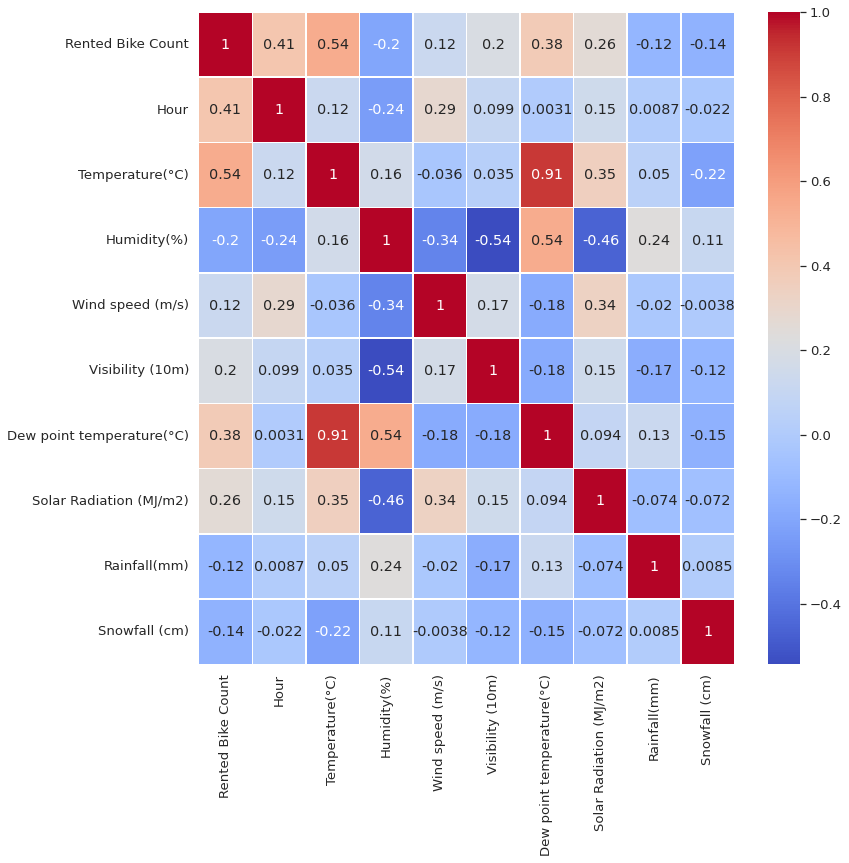

In [78]:
# Multicolinearity
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=.5 , ax=ax,cmap="coolwarm")
plt.show()

In [ ]:
# There exists a high multicollinearity between Temperature and Dew point Temperature
# Lets create a feature new feature Temperature which comprises the addition of temperature and dew point temperature

#df['Temperature'] = df['Temperature(°C)'] + df['Dew point temperature(°C)']
#df.drop('Temperature(°C)',axis = 1,inplace = True)
#df.drop('Dew point temperature(°C)',axis = 1,inplace = True)

In [85]:
# Varinace Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Rented Bike Count']]])

,variables,VIF
0,Hour,4.421829
1,Temperature(°C),33.431756
2,Humidity(%),5.390747
3,Wind speed (m/s),4.903021
4,Visibility (10m),9.089457
5,Dew point temperature(°C),17.156495
6,Solar Radiation (MJ/m2),2.892990
7,Rainfall(mm),1.081562
8,Snowfall (cm),1.120838


Text(0.5, 1.0, 'Square root')

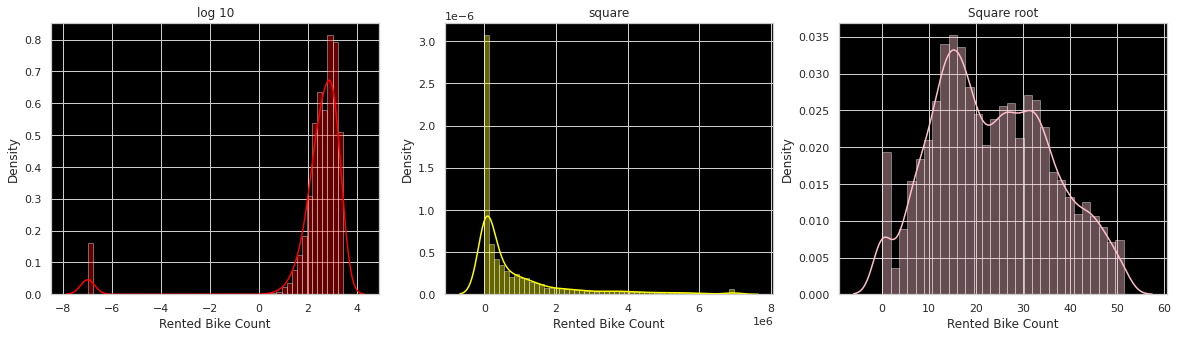

In [92]:
# Normalising dependant variable 
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='yellow').set_title("square")
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='pink').set_title("Square root")